<a href="https://colab.research.google.com/github/AnisimovaPV/Machine-learning/blob/main/L_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

# **Информация о данных**

Датасет содержит информацию о черной пятнице. Розничная компания «ABC Private Limited» хочет понять покупательское поведение клиентов (в частности, сумму покупки) в отношении различных продуктов разных категорий. Они поделились сводкой о покупках различных клиентов для выбранных крупносерийных продуктов за последний месяц.
Набор данных также содержит демографические данные клиентов (возраст, пол, семейное положение, тип города, пребывание в текущем городе), сведения о продукте (идентификатор продукта и категория продукта) и общую сумму покупки за последний месяц. По признакам необходимо узнать, кто совершил покупку(мужчина или женщина)

# **Загрузка данных**

In [2]:
url = "https://raw.githubusercontent.com/AnisimovaPV/Z/main/train.csv"
data_raw = pd.read_csv(url, sep=',', engine='python')
data_raw.shape


(550068, 12)

In [3]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/AnisimovaPV/Z/main/train.csv")
data_raw.shape     

(550068, 12)

In [4]:
data_raw.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data_raw.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Каждая строка соответсвует одному покупателю. Столбцы (признаки):

* User_ID Идентификатор пользователя
* Product_ID Идентификатор продукта
* Gender пользователя
* Age Возраст
* Occupation Род занятий 
* City_Category Категория города (A,B,C)
* Stay_In_Current_City_Years Количество лет пребывания в текущем городе
* Marital_Status Семейное положение
* Product_Category_1 Категория продукта 
* Product_Category_2 Продукт может принадлежать и к другой категории 
* Product_Category_3 Продукт может принадлежать и к другой категории 
* Purchase Сумма покупки

Имена ячеек:


In [7]:
data_raw.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
data_raw.index

RangeIndex(start=0, stop=550068, step=1)

**Обработка пропущенных значений**

In [9]:
categorical_columns = [c for c in data_raw.columns if data_raw[c].dtype.name == 'object']
numerical_columns   = [c for c in data_raw.columns if data_raw[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


Исследуем категориальные и количественные данные на наличие пустых значений и обработаем их

In [10]:
data_raw[categorical_columns].count(axis = 0)

Product_ID                    550068
Gender                        550068
Age                           550068
City_Category                 550068
Stay_In_Current_City_Years    550068
dtype: int64

In [11]:
data_raw[numerical_columns].count(axis = 0)

User_ID               550068
Occupation            550068
Marital_Status        550068
Product_Category_1    550068
Product_Category_2    376430
Product_Category_3    166821
Purchase              550068
dtype: int64

In [ ]:
Тут пропуски медианным значением

In [12]:
data_raw['Product_Category_2'] = data_raw['Product_Category_2'].fillna(data_raw['Product_Category_2'].median(axis = 0), axis = 0)
data_raw['Product_Category_3'] = data_raw['Product_Category_3'].fillna(data_raw['Product_Category_3'].median(axis = 0), axis = 0)

In [13]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


**Обработка категориальных значений**

Столбцы ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'] содержат категориальные признаки. Необходимо заменить их тип 'Object' на специальный, предназначенный для хранения категориальных значений

In [14]:
data_raw['Gender'] = data_raw['Gender'].astype('category')
data_raw['Age'] = data_raw['Age'].astype('category')
data_raw['City_Category'] = data_raw['City_Category'].astype('category')
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].astype('category')

In [15]:
data_raw['Gender'].dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [16]:
data_raw['Age'].dtype

CategoricalDtype(categories=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'], ordered=False)

In [17]:
data_raw['City_Category'].dtype


CategoricalDtype(categories=['A', 'B', 'C'], ordered=False)

In [18]:
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].replace("Free", np.nan , regex=True)
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].apply(lambda v: float(str(v).replace("+","")))
data_raw['Stay_In_Current_City_Years'] = data_raw['Stay_In_Current_City_Years'].astype('float')
data_raw['Stay_In_Current_City_Years'].dtype

dtype('float64')

In [19]:
data_raw['Stay_In_Current_City_Years'].dtype

dtype('float64')

**Обработка выбросов**

Построим графики зависимостей, чтобы оценить количество выбросов

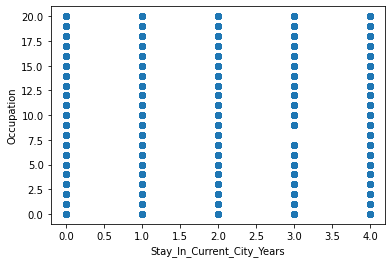

In [20]:
plt.scatter(data_raw['Stay_In_Current_City_Years'], data_raw['Occupation'], alpha=1)
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Occupation')
pass

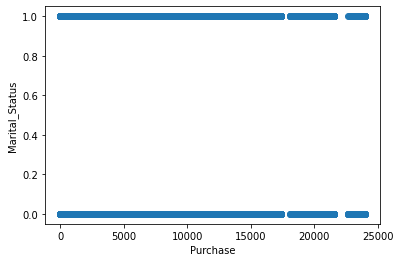

In [21]:
plt.scatter(data_raw['Purchase'], data_raw['Marital_Status'], alpha=1)
plt.xlabel('Purchase')
plt.ylabel('Marital_Status')
pass

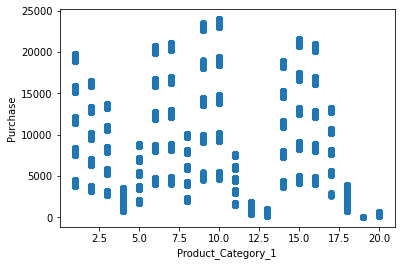

In [22]:
plt.scatter(data_raw['Product_Category_1'], data_raw['Purchase'], alpha=1)
plt.xlabel('Product_Category_1')
plt.ylabel('Purchase')
pass

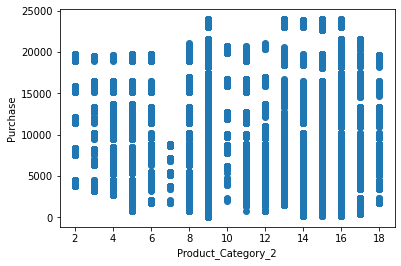

In [23]:
plt.scatter(data_raw['Product_Category_2'], data_raw['Purchase'], alpha=1)
plt.xlabel('Product_Category_2')
plt.ylabel('Purchase')
pass

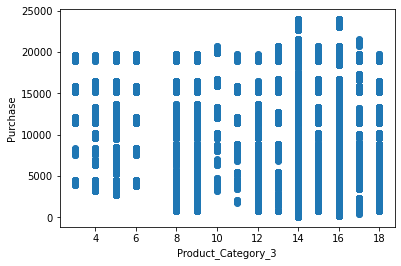

In [24]:
plt.scatter(data_raw['Product_Category_3'], data_raw['Purchase'], alpha=1)
plt.xlabel('Product_Category_3')
plt.ylabel('Purchase')
pass

Нужно найти квантили для этих признаков

In [25]:
data_raw['Purchase'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     3540.0
0.500     8047.0
0.700    11528.0
0.900    16317.0
0.950    19336.0
0.999    23729.0
1.000    23961.0
Name: Purchase, dtype: float64

In [26]:
data_raw['Product_Category_1'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     1.0
0.500     5.0
0.700     8.0
0.900    11.0
0.950    13.0
0.999    20.0
1.000    20.0
Name: Product_Category_1, dtype: float64

In [27]:
data_raw['Product_Category_2'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100     4.0
0.500     9.0
0.700    12.0
0.900    16.0
0.950    16.0
0.999    18.0
1.000    18.0
Name: Product_Category_2, dtype: float64

In [28]:
data_raw['Product_Category_3'].quantile([.1,.5,.70, .90, .95, .999, 1])

0.100    12.0
0.500    14.0
0.700    14.0
0.900    15.0
0.950    16.0
0.999    18.0
1.000    18.0
Name: Product_Category_3, dtype: float64

Избавимся от строк с большими значение которых превышает 0,995 квантиля.



In [29]:
rows_to_drop = data_raw[
    (data_raw['Product_Category_1'] > data_raw['Product_Category_1'].quantile(0.995)) | 
    (data_raw['Product_Category_2'] > data_raw['Product_Category_2'].quantile(0.995)) | 
    (data_raw['Product_Category_3']  > data_raw['Product_Category_3' ].quantile(0.995))| 
    (data_raw['Purchase']  > data_raw['Purchase' ].quantile(0.995))].index
    
data1 = data_raw.drop(rows_to_drop)
data1.shape

(544768, 12)

**Визуализация и описательная статистика**

In [30]:
data1.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.447680e+05,544768.000000,544768.000000,544768.000000,544768.000000,544768.000000,544768.000000,544768.000000
mean,1.003028e+06,8.074090,1.858569,0.409433,5.309216,9.558676,13.589818,9235.304572
std,1.727278e+03,6.522524,1.289540,0.491730,3.805348,4.233170,2.362523,4911.594911
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,8.000000,14.000000,5840.000000
50%,1.003075e+06,7.000000,2.000000,0.000000,5.000000,9.000000,14.000000,8046.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,14.000000,14.000000,12029.000000
max,1.006040e+06,20.000000,4.000000,1.000000,19.000000,18.000000,18.000000,21352.000000


In [31]:
data1.describe(include=['category'])

,Gender,Age,City_Category
count,544768,544768,544768
unique,2,7,3
top,M,26-35,B
freq,410285,217734,229334


**Вычислим матрицу корреляции**

In [32]:
corr_matrix = data1.corr()
corr_matrix

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.024150,-0.030770,0.020452,0.003668,0.001329,0.000965,0.004251
Occupation,-0.024150,1.000000,0.030274,0.024150,-0.008762,0.000294,0.004195,0.020662
Stay_In_Current_City_Years,-0.030770,0.030274,1.000000,-0.012750,-0.004103,-0.001064,0.000726,0.005657
Marital_Status,0.020452,0.024150,-0.012750,1.000000,0.019916,0.011308,0.012604,-0.001321
Product_Category_1,0.003668,-0.008762,-0.004103,0.019916,1.000000,0.341736,0.198235,-0.354346
Product_Category_2,0.001329,0.000294,-0.001064,0.011308,0.341736,1.000000,0.416608,-0.176471
Product_Category_3,0.000965,0.004195,0.000726,0.012604,0.198235,0.416608,1.000000,-0.100227
Purchase,0.004251,0.020662,0.005657,-0.001321,-0.354346,-0.176471,-0.100227,1.000000


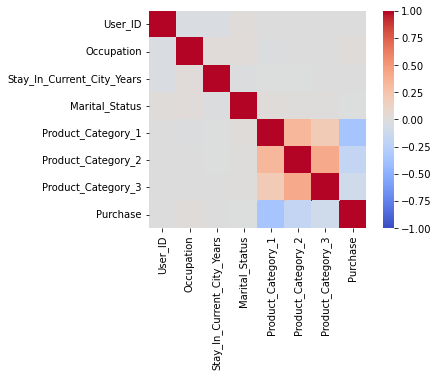

In [33]:
corr_mat = data1.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm', vmin=-1.0, vmax=1.0)
pass
     

In [34]:
data1['Gender'].value_counts()

M    410285
F    134483
Name: Gender, dtype: int64

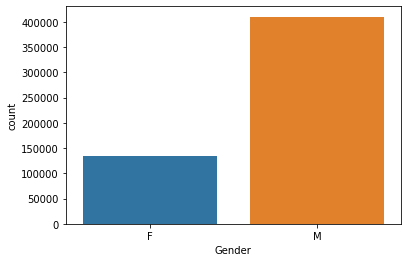

In [35]:
sns.countplot(data=data1,x='Gender')
pass

**Обработка категориальных значений**

Мы имеем категориальный признаков: 'Gender','City_Category', 'Age'.

In [36]:
data_raw['City_Category'].unique()
city_dummies = pd.get_dummies(data_raw['City_Category'])
city_dummies.head()

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [37]:
data_raw['Age'].unique()
age_dummies = pd.get_dummies(data_raw['Age'])
age_dummies.head()

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1


In [38]:
data_raw['Gender'] = data_raw['Gender'].astype('object')

data_raw.loc[(data_raw['Gender'] == 'F'), 'Gender'] = 0
data_raw.loc[(data_raw['Gender'] == 'M'), 'Gender'] = 1

In [39]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  float64 
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category_1          550068 non-null  int64   
 9   Product_Category_2          550068 non-null  float64 
 10  Product_Category_3          550068 non-null  float64 
 11  Purchase                    550068 non-null  int64   
dtypes: category(2), float64(3), int64(5), object(2)
memory usa

In [40]:
data_raw = pd.concat((data_raw, city_dummies), axis = 1)
data_raw = pd.concat((data_raw, age_dummies), axis = 1)

data_raw = data_raw.drop(['City_Category'], axis = 1)
data_raw.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,...,A,B,C,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1000001,P00069042,0,0-17,10,2.0,0,3,9.0,14.0,...,1,0,0,1,0,0,0,0,0,0
1,1000001,P00248942,0,0-17,10,2.0,0,1,6.0,14.0,...,1,0,0,1,0,0,0,0,0,0
2,1000001,P00087842,0,0-17,10,2.0,0,12,9.0,14.0,...,1,0,0,1,0,0,0,0,0,0
3,1000001,P00085442,0,0-17,10,2.0,0,12,14.0,14.0,...,1,0,0,1,0,0,0,0,0,0
4,1000002,P00285442,1,55+,16,4.0,0,8,9.0,14.0,...,0,0,1,0,0,0,0,0,0,1


In [41]:
data_raw = data_raw.drop(['Age'], axis = 1)
data_raw.head()

,User_ID,Product_ID,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1000001,P00069042,0,10,2.0,0,3,9.0,14.0,8370,1,0,0,1,0,0,0,0,0,0
1,1000001,P00248942,0,10,2.0,0,1,6.0,14.0,15200,1,0,0,1,0,0,0,0,0,0
2,1000001,P00087842,0,10,2.0,0,12,9.0,14.0,1422,1,0,0,1,0,0,0,0,0,0
3,1000001,P00085442,0,10,2.0,0,12,14.0,14.0,1057,1,0,0,1,0,0,0,0,0,0
4,1000002,P00285442,1,16,4.0,0,8,9.0,14.0,7969,0,0,1,0,0,0,0,0,0,1


In [42]:
data_raw=data_raw.drop(['Product_ID'], axis = 1)

In [43]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  float64
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   A                           550068 non-null  uint8  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
 12  0-17                        550068 non-null  uint8  
 13  18-25         

### **Нормализация**

Проведем нормализацию с помощью линейного преобразования к отрезку [0,1]

In [44]:
data_norm = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_norm.describe()

,User_ID,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C,0-17,18-25,26-35,36-45,46-50,51-55,55+
count,550068.000000,550068.0,550068.0,550068.00,550068.0,550068.000000,550068.0000,550068.000000,550068.000000,550068.0,550068.0,550068.0,550068.0,550068.0,550068.0,550068.0,550068.0,550068.0,550068.0
unique,5891.000000,2.0,21.0,5.00,2.0,20.000000,17.0000,15.000000,18105.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,0.278026,1.0,0.2,0.25,0.0,0.210526,0.4375,0.733333,0.292246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,1026.000000,414259.0,72308.0,193821.00,324731.0,150933.000000,179331.0000,401675.000000,191.000000,402348.0,318895.0,378893.0,534966.0,450408.0,330481.0,440055.0,504367.0,511567.0,528564.0


In [45]:
data_norm.isna().sum()


User_ID                       0
Gender                        0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
A                             0
B                             0
C                             0
0-17                          0
18-25                         0
26-35                         0
36-45                         0
46-50                         0
51-55                         0
55+                           0
dtype: int64

In [46]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data_norm.describe()

,User_ID,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C,0-17,18-25,26-35,36-45,46-50,51-55,55+
count,550068.000000,550068.0,550068.0,550068.00,550068.0,550068.000000,550068.0000,550068.000000,550068.000000,550068.0,550068.0,550068.0,550068.0,550068.0,550068.0,550068.0,550068.0,550068.0,550068.0
unique,5891.000000,2.0,21.0,5.00,2.0,20.000000,17.0000,15.000000,18105.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,0.278026,1.0,0.2,0.25,0.0,0.210526,0.4375,0.733333,0.292246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,1026.000000,414259.0,72308.0,193821.00,324731.0,150933.000000,179331.0000,401675.000000,191.000000,402348.0,318895.0,378893.0,534966.0,450408.0,330481.0,440055.0,504367.0,511567.0,528564.0


# **Обучение**

**Выбор обучающей и тестовой выборок**

In [47]:
X = data_raw.drop('Gender', axis = 1)
y = data_raw['Gender']
feature_names = X.columns

In [48]:
feature_names

Index(['User_ID', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'A', 'B', 'C', '0-17', '18-25', '26-35', '36-45', '46-50',
       '51-55', '55+'],
      dtype='object')

In [49]:
X = X.to_numpy()
type(X)

numpy.ndarray

In [50]:
y = np.array(y, dtype='int')
y

array([0, 0, 0, ..., 0, 0, 0])

**Проверка на совпадение размерности массивов для работы с ними**

разобьем данные на обучающую и тестовую выборки. За обучающую возьмем 0.75 данных, за тестовую 0,25

In [51]:
print(X.shape)
print(y.shape)
N, d = X.shape

(550068, 18)
(550068,)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test, _ = X_test.shape

print(N_train, N_test)

412551 137517


**kNN - метод ближайших соседей**

10 соседей

In [53]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [54]:
knn

KNeighborsClassifier(n_neighbors=10)

In [55]:
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)

In [56]:
err_test

0.2522088178188878

7 соседей

In [57]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test
     

0.24379531257953563

13 соседей

In [58]:

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
err_test = np.mean(y_test != y_test_predict)
err_test

0.24260273275304145

**Random Forest**

In [59]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.019088549052117192


In [60]:
np.sum(rf.feature_importances_)


1.0

In [61]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]])) 

Feature ranking:
 1. feature 'User_ID' (0.402571)
 2. feature 'Occupation' (0.177336)
 3. feature 'Stay_In_Current_City_Years' (0.096126)
 4. feature 'Purchase' (0.094989)
 5. feature 'Marital_Status' (0.030876)
 6. feature 'Product_Category_2' (0.027388)
 7. feature 'Product_Category_1' (0.026002)
 8. feature '    B' (0.019356)
 9. feature '    A' (0.018381)
10. feature '    C' (0.018230)
11. feature 'Product_Category_3' (0.016252)
12. feature '36-45' (0.015557)
13. feature '26-35' (0.015517)
14. feature '18-25' (0.013190)
15. feature '51-55' (0.008862)
16. feature '46-50' (0.008805)
17. feature '  55+' (0.006528)
18. feature ' 0-17' (0.004034)


(-5.0, 15.0)

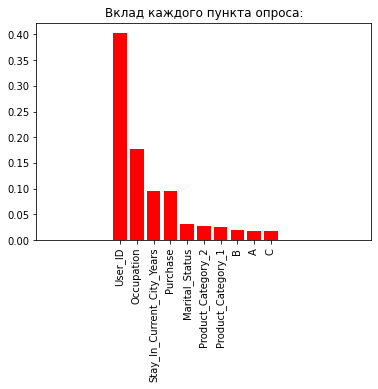

In [62]:
d_first = 10
plt.title("Вклад каждого пункта опроса:")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'red')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-5, d_first+5])

User_ID, Occupation, Stay_In_Curent_City_Years, Purchase вносят значительный вклад

### **Вывод:**

В данной работе был произведен анализ данных и решение задачи классификации с помощью моделей, натренированых методами К-ближайших соседей и дерева решений.

Алгоритм Дерева Решений оказался точнее алгоритма к-ближайших соседей при оптимальных параметрах каждого из методов, как на обучающей выборке, так и на тестовой.

### **Лабораторная работа 2**

Обучение классификатора


In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [64]:
model = MLPClassifier(
    hidden_layer_sizes=(50,),
    solver='adam',
    activation='relu',
    random_state=3,
    max_iter=1000
)

In [65]:
%%time
model.fit(X_train, y_train)

CPU times: user 17min 1s, sys: 13min 44s, total: 30min 45s
Wall time: 16min 13s


MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=3)

In [66]:
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [67]:
print("Train: {:.2f}% Test: {:.2f}%".format(accuracy_score(y_train.astype('int64'), y_train_prediction)
      * 100, accuracy_score(y_test.astype('int64'), y_test_prediction) * 100))

Train: 24.64% Test: 24.83%


Точности на тестовой и тренировочной выборках приблизительно одинковы, что является хорошим результатом



### **Подбор гиперпараметров**

In [68]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam', activation = 'relu', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_prediction = mlp_model.predict(X_train)
    y_test_prediction = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_prediction))
    test_err.append(np.mean(y_test!= y_test_prediction))
    train_acc.append(sklearn.metrics.accuracy_score(y_train, y_train_prediction))
    test_acc.append(sklearn.metrics.accuracy_score(y_test, y_test_prediction))

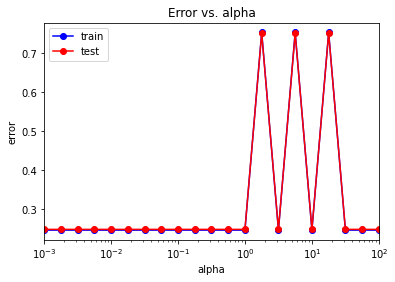

In [69]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

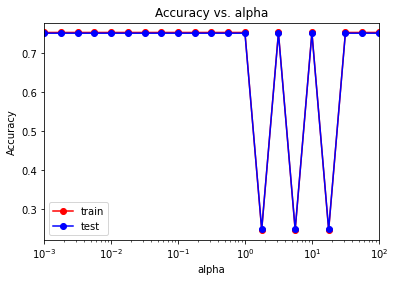

In [70]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Из графика выше следует, что у нас нет ни недообучения, ни переобучения. Колебания точности как на тренировочной, так и на тестовой выборке происходят в одном диапазоне.

Выявим минимальное значение ошибки

In [71]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.2464180186207281 0.24832566155457145


Оптимальное значение альфа

In [72]:
alpha_optarr = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_optarr[0]
print(alpha_opt)

0.001


In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Метрика качества

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     34149
           1       0.75      1.00      0.86    103368

    accuracy                           0.75    137517
   macro avg       0.38      0.50      0.43    137517
weighted avg       0.57      0.75      0.65    137517



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Подбор количества нейронов в скрытом слое**

In [ ]:
neuron_count_array = np.linspace(10, 300, 30).astype(int)
test_error = []
train_error = []
test_acc = []
train_acc = []

for neuron_count in neuron_count_array:
    model = MLPClassifier(
        alpha=alpha_opt,
        hidden_layer_sizes=(neuron_count,),
        solver='adam',
        activation='relu',
        max_iter=1000,
        random_state=42
    )
    model.fit(X_train, y_train)

    y_train_prediction = model.predict(X_train)
    y_test_prediction = model.predict(X_test)

    test_error.append(np.mean(y_test != y_test_prediction))
    train_error.append(np.mean(y_train != y_train_prediction))
    test_acc.append(accuracy_score(y_test, y_test_prediction))
    train_acc.append(accuracy_score(y_train, y_train_prediction))

In [ ]:
plt.plot(neuron_count_array, train_error, 'r-o', label='train')
plt.plot(neuron_count_array, test_error, 'b-o', label='test')
plt.xlim([np.min(neuron_count_array), np.max(neuron_count_array)])
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()

In [ ]:
plt.plot(neuron_count_array, train_acc, 'r-o', label='train')
plt.plot(neuron_count_array, test_acc, 'b-o', label='test')
plt.xlim([np.min(neuron_count_array), np.max(neuron_count_array)])
plt.title('Accuracy vs. neuron count')
plt.xlabel('neuron count')
plt.ylabel('Accuracy')
plt.legend()

Здесь также не наблюдается ни недообучения, ни переобучения. Колебания происходятся в целом синхронно.



In [ ]:
min_test_error = np.min(test_error)
neuron_opt = neuron_count_array[test_error == min_test_error][0]
print('Optimal number of neurons: {}'.format(neuron_opt))

# **Матрица рассогласования**

In [ ]:
confusion = confusion_matrix(y_test, y_test_prediction, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
display.plot()
plt.show()
pass